# Password Strength Classifier

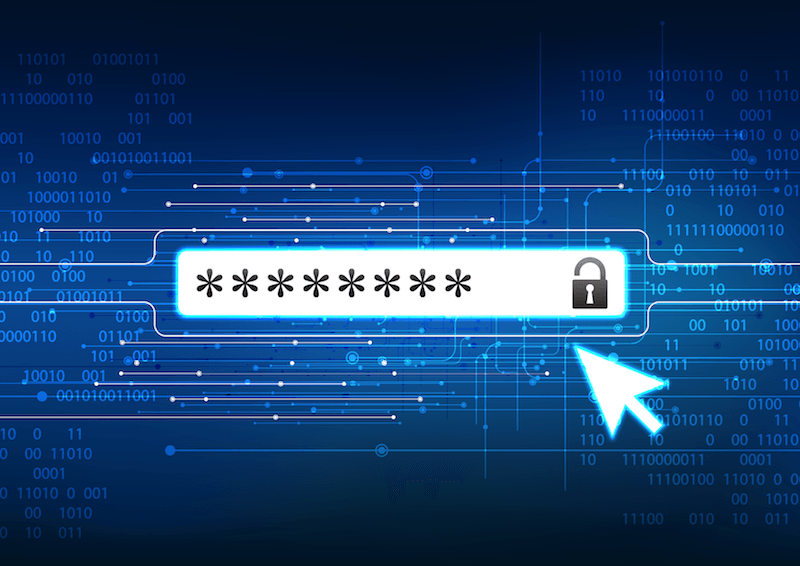

**The point of this python noteboook is to see how accurate KNN and Naive Bayes are to choosing good and bad passwords**

**Features**

We were only provided a data set that had two features which were passwords and the strength

Calvin Ng and Arturo Delgado
Decided to add multiple features that differentiate a password.

**Final Features**


1.   Passwords : The password that is entered
2.   Strength  : The Strength is in categories of 0=bad, 1 = medium, 2 = excellent
3.   UpperCase : How many Uppercases in the password
4.   LowerCase : How many LowerCase  in the password
5.   Numbers   : How many Numbers are in the password
6.   SpecialCharacter: How many Special Characters there are in the password
7.   Length    : The overall length of the password




# Import Libraies and csv files

**The raw data is shown bellow.**

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
raw_data = pd.read_csv('/content/sample_data/datafinal.csv')
#raw_data.head()
raw_data = raw_data.iloc[0:-1]
raw_data = raw_data.drop(367561)
#raw_data = raw_data.drop(26963)

#raw_data.drop(raw_data.columns[len(raw_data.columns)-1],axis=1,inplace = True)
display(raw_data)

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669598,10redtux10,1
669599,infrared1,1
669600,184520socram,1
669601,marken22a,1


# Adding Extra Features



**Added features and cleaned the data to not have outlying features and NaN in one case**

In [3]:
def Upperc(row):
  upper = 0
  counter = 0
  j = row.password
  counter = counter +1
  for i in range(0,len(j)):
    if j[i].isupper() and j[i].isalpha() == True: # checks for uppcase and then counts them
      upper = upper +1

  return upper
def Lowerc(row):
  lower = 0
  j = row.password
  for i in range(0,len(j)):
    if j[i].isupper() == False and j[i].isalpha() == True:#checks for lower case and then counts them
      lower = lower +1
  return lower

def Number(row):
  number = 0
  j = row.password
  for i in range(0,len(j)):
    if j[i].isdecimal() == True and j[i].isalpha() == False:#checks if its a number
      number = number +1
  return number

def Specialc(row):
  special = 0
  j = row.password
  for i in range(0,len(j)):
    if j[i].isdecimal() == False and j[i].isalpha() == False:
      special = special +1
  return special
def Length(row):
  j = row.password
  return len(j)

  

raw_data['UpperCase'] = raw_data.apply(Upperc,axis=1)
raw_data['LowerCase'] = raw_data.apply(Lowerc,axis=1)
raw_data['Numbers'] = raw_data.apply(Number,axis=1)
raw_data['SpecialCharacters'] = raw_data.apply(Specialc,axis=1)
raw_data['Length'] = raw_data.apply(Length,axis=1)
#raw_data.head()

clean_data = raw_data

clean_data = clean_data[clean_data['Length'] < 30]
clean_data.head()

,password,strength,UpperCase,LowerCase,Numbers,SpecialCharacters,Length
0,kzde5577,1,0,4,4,0,8
1,kino3434,1,0,4,4,0,8
2,visi7k1yr,1,0,7,2,0,9
3,megzy123,1,0,5,3,0,8
4,lamborghin1,1,0,10,1,0,11


#Data Visualization 

In [4]:
pwdavglength = clean_data['Length'].mean()
pwdavgstr = clean_data['strength'].mean()
print(pwdavglength)
print(pwdavgstr)


9.983407596835075
0.9899964598491627


1    496772
0     89694
2     82997
Name: strength, dtype: int64

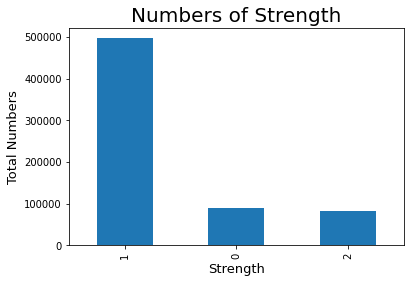

In [6]:
clean_data['strength'].value_counts().plot(kind='bar')
plt.title('Numbers of Strength', fontsize=20)
plt.xlabel('Strength', fontsize=13)
plt.ylabel("Total Numbers", fontsize=13)
clean_data['strength'].value_counts()

0     650168
1      12337
2       4121
3       1649
4        565
6        306
5        181
7         57
8         37
9         22
10         9
11         5
13         3
20         1
16         1
12         1
Name: SpecialCharacters, dtype: int64

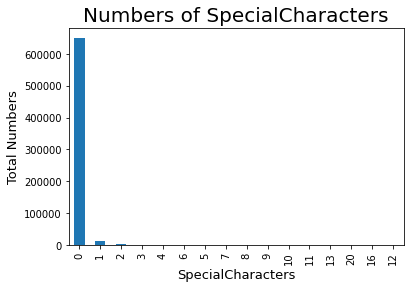

In [8]:
clean_data['SpecialCharacters'].value_counts().plot(kind='bar')
plt.title('Numbers of SpecialCharacters', fontsize=20)
plt.xlabel('SpecialCharacters', fontsize=13)
plt.ylabel("Total Numbers", fontsize=13)
clean_data['SpecialCharacters'].value_counts()


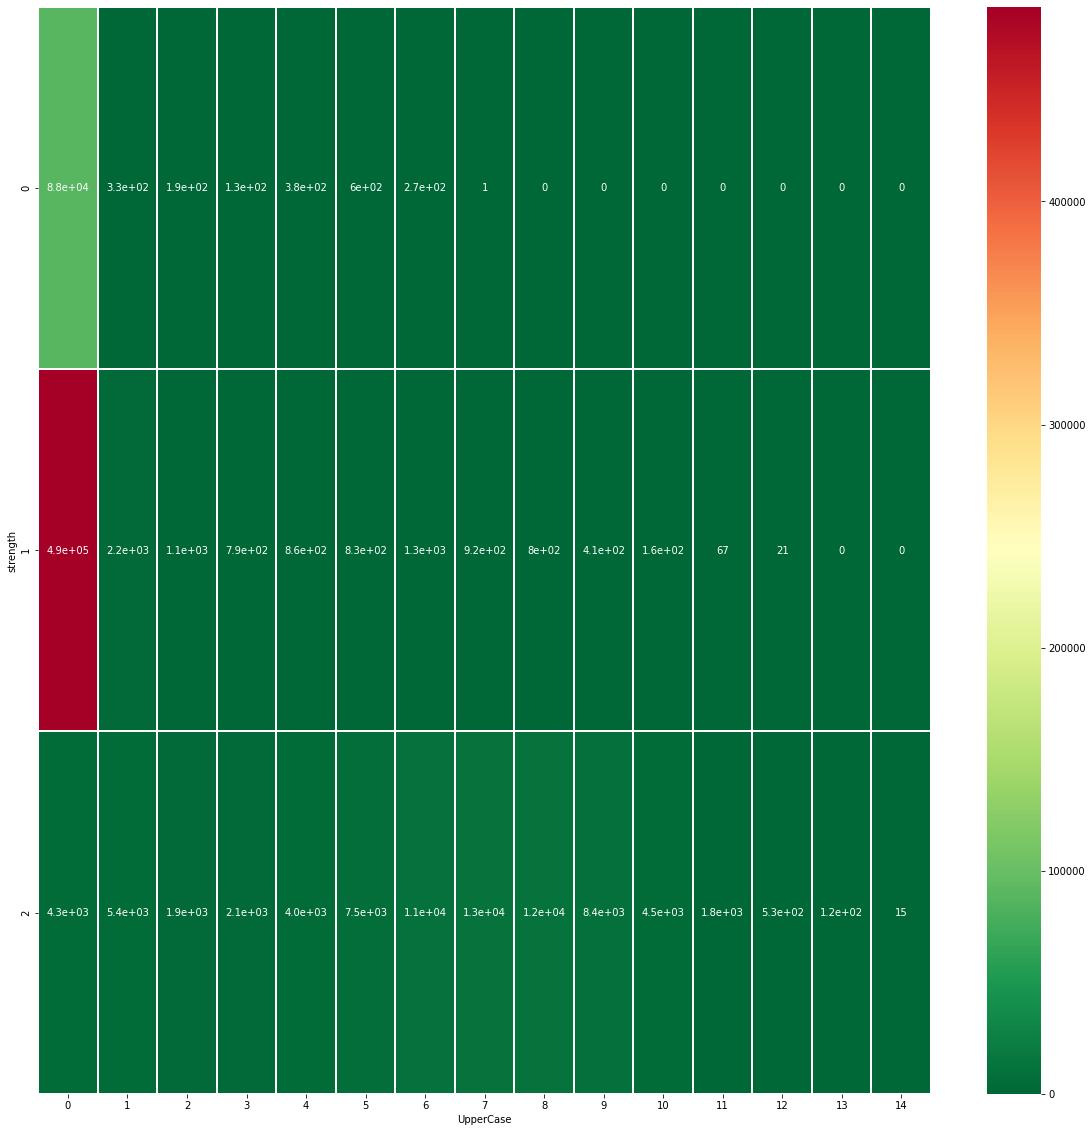

In [9]:
clean_UpperCase_data = clean_data[clean_data['Length'] < 17]
UppercStrength = pd.crosstab(clean_UpperCase_data.strength, clean_UpperCase_data.UpperCase)
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(UppercStrength,cmap='RdYlGn_r', linewidths=1,annot=True)

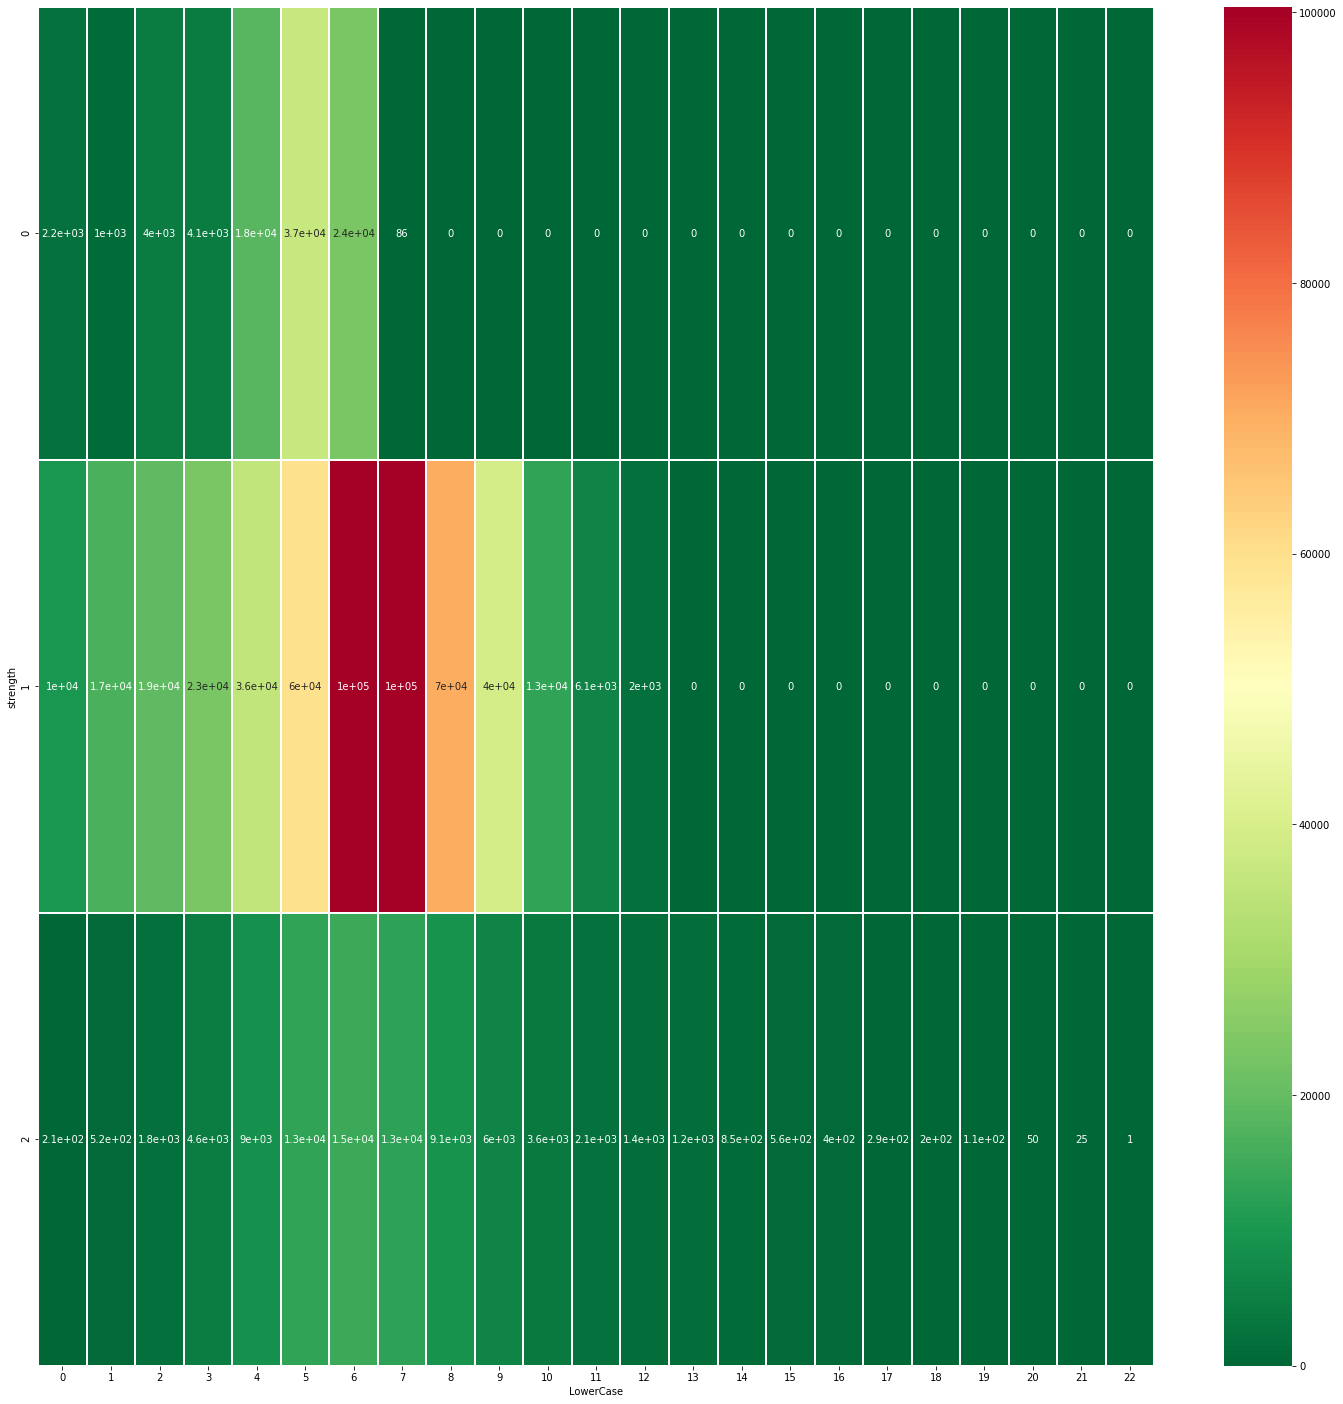

In [10]:
clean_LowerCase_data = clean_data[clean_data['Length'] < 25]
LowercStrength = pd.crosstab(clean_LowerCase_data.strength, clean_LowerCase_data.LowerCase)
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(LowercStrength,cmap='RdYlGn_r', linewidths=1,annot=True)

In [12]:
# clean_data['LowerCase'].value_counts()
# clean_data['Length'].value_counts()
# clean_data['UpperCase'].value_counts()

# Training set and Testing set


In [13]:
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = clean_data.strength
X = clean_data.drop(['strength'], axis = 1)
Z = X.drop(['password'],1)
X_train,X_test,y_train,y_test= train_test_split(Z,y,test_size=0.2, random_state=2, stratify = y)
display(X_test)
display(y)

,UpperCase,LowerCase,Numbers,SpecialCharacters,Length
625992,0,9,2,0,11
396737,0,5,4,0,9
469989,0,6,1,0,7
157045,0,5,7,0,12
191203,0,6,3,0,9
...,...,...,...,...,...
47323,0,1,7,0,8
408174,0,4,2,0,6
179406,10,4,2,0,16
622214,0,5,6,0,11


0         1
1         1
2         1
3         1
4         1
         ..
669598    1
669599    1
669600    1
669601    1
669602    1
Name: strength, Length: 669463, dtype: int64

# Kth Nearest Neighbor

In [14]:
import time
from sklearn.preprocessing import LabelEncoder
from sklearn import utils
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
starttime = time.time()
#print(clf,X_test,y_train)
#encoded = LabelEncoder()
#ended1 = encoded.fit_transform(y_train)
clf_A = KNeighborsClassifier(n_neighbors = 3)
clf_A.fit(X_train,y_train)
endtime = time.time()
kNN = clf_A.predict(X_test)

In [15]:
from sklearn.metrics import f1_score
target = clf_A.predict(X_test)
target1 = clf_A.predict(X_train)
#f1_score(y_train, target1, average='macro'), sum(y_train == target1) / float(len(target1))
#f1_score(y_test, target, average='macro'), sum(y_test == target) / float(len(target))
accuracy = clf_A.score(X_test,y_test)
print("Accuracy: ", accuracy)
print(f"Training time: {endtime - starttime}s")
print(clf_A.predict(X_test))
probability = clf_A.predict_proba(X_test)
probability = pd.DataFrame(probability, columns=['Strength 0', 'Strength 1','Strength 2'])
display((probability).head(15))

Accuracy:  0.9995966928816293
Training time: 121.39090991020203s
[1 1 0 ... 2 1 1]


,Strength 0,Strength 1,Strength 2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,0.0,0.0,1.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0
9,0.0,1.0,0.0


# Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
starttime1 = time.time()
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
endtime1 = time.time()
decisionpre = clf_dt.predict(X_test)
#target3 = clf_dt.predict(X_train)
#finalscore=f1_score(y_test, target2, average='macro'), sum(y_test == target2) / float(len(target2))
#f1_score(y_train, target3, average='macro')#, sum(y_train == target3) / float(len(target3))
accuracy2 = clf_dt.score(X_test,y_test)
print("Accuracy: ", accuracy2)
print(f"Training time: {endtime1 - starttime1}s")
print(decisionpre)
probabilitydt = clf_dt.predict_proba(X_test)
probabilitydt = pd.DataFrame(probabilitydt, columns=['Strength 0', 'Strength 1','Strength 2'])
display((probabilitydt).head(10))

Accuracy:  0.9996415047836705
Training time: 0.3149373531341553s
[1 1 0 ... 2 1 1]


,Strength 0,Strength 1,Strength 2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,0.0,0.0,1.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0
9,0.0,1.0,0.0


# Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB
clf_nb = GaussianNB()
starttime2 = time.time()
clf_nb.fit(X_train,y_train)
endtime2 = time.time()

In [18]:
accuracy3 = clf_nb.score(X_test,y_test)
print("Accuracy: " , accuracy3)
print(f"Training time: {endtime2 - starttime2}s")
print(clf_nb.predict(X_test))
probabilitynb = clf_nb.predict_proba(X_test)
probabilitynb = pd.DataFrame(probabilitynb, columns=['Strength 0', 'Strength 1','Strength 2'])
display((probabilitynb).head(10))

Accuracy:  0.979797300829767
Training time: 0.126115083694458s
[1 1 0 ... 2 1 1]


,Strength 0,Strength 1,Strength 2
0,2.393688e-18,9.999869e-01,1.312197e-05
1,1.578974e-06,9.999984e-01,1.382696e-08
2,8.899669e-01,1.100331e-01,5.730445e-12
3,1.717034e-30,9.999020e-01,9.796957e-05
4,6.773770e-06,9.999932e-01,1.584747e-08
5,1.578974e-06,9.999984e-01,1.382696e-08
6,2.839912e-109,1.468364e-30,1.000000e+00
7,9.624358e-08,9.999999e-01,1.262046e-08
8,2.229001e-06,9.999977e-01,2.383323e-08
9,1.700100e-26,9.997115e-01,2.884846e-04


# Conclusion

**Overall Decision Tree is more accurate than any other model and it is a lot faster when computing. KNN was second best but took way too long to compute due to its N^2 run time**

In [19]:
print("Naive Bayes")
print("Accuracy: ", accuracy3)
print(f"Training time: {endtime2 - starttime2}s")
print(" ")

print("Kth Nearest Neighbor")
print("Accuracy: ", accuracy)
print(f"Training time: {endtime - starttime}s")
print(" ")

print("Decision Tree")
print("Accuracy: ", accuracy2)
print(f"Training time: {endtime1 - starttime1}s")
print(" ")

Naive Bayes
Accuracy:  0.979797300829767
Training time: 0.126115083694458s
 
Kth Nearest Neighbor
Accuracy:  0.9995966928816293
Training time: 121.39090991020203s
 
Decision Tree
Accuracy:  0.9996415047836705
Training time: 0.3149373531341553s
 
